# Let's Grow More - Data Science Intern  LGMVIP June-2022

# Keya Patel

# Beginner Level Task

# Task 1 - Iris Flowers Classification ML Project

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

In [6]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                names=["Sepal_Length_in_cm","Sepal_Width_in_cm","Petal_Length_in_cm","Petal_Width_in_cm","Species_Flower"])

In [7]:
df

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.head(10)

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
df.shape

(150, 5)

In [10]:
df.columns

Index(['Sepal_Length_in_cm', 'Sepal_Width_in_cm', 'Petal_Length_in_cm',
       'Petal_Width_in_cm', 'Species_Flower'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal_Length_in_cm  150 non-null    float64
 1   Sepal_Width_in_cm   150 non-null    float64
 2   Petal_Length_in_cm  150 non-null    float64
 3   Petal_Width_in_cm   150 non-null    float64
 4   Species_Flower      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.isnull().sum()

Sepal_Length_in_cm    0
Sepal_Width_in_cm     0
Petal_Length_in_cm    0
Petal_Width_in_cm     0
Species_Flower        0
dtype: int64

In [13]:
df['Species_Flower'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df.describe()

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

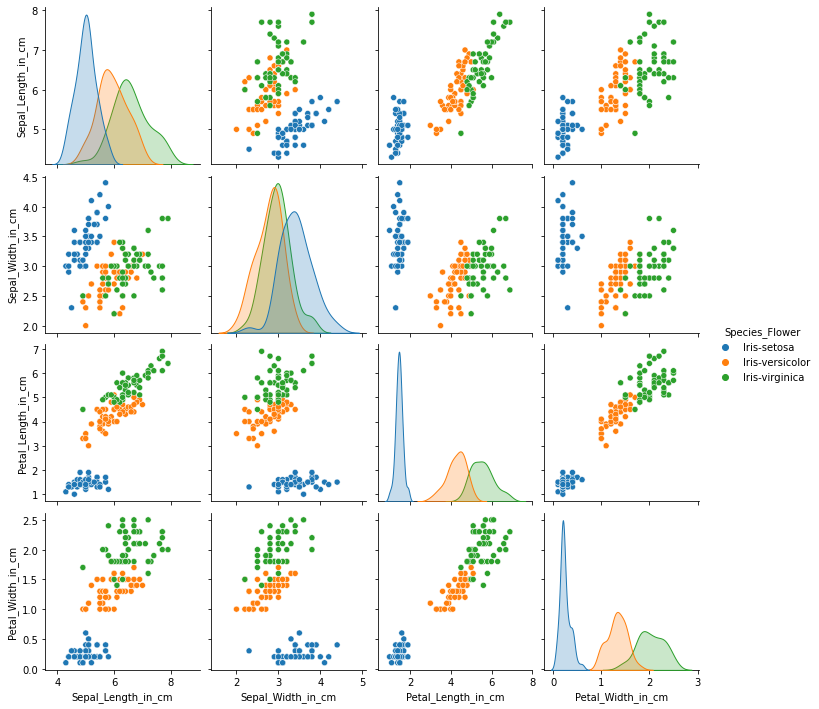

In [15]:
sns.pairplot(df,hue="Species_Flower")

<AxesSubplot:xlabel='Sepal_Width_in_cm', ylabel='Petal_Width_in_cm'>

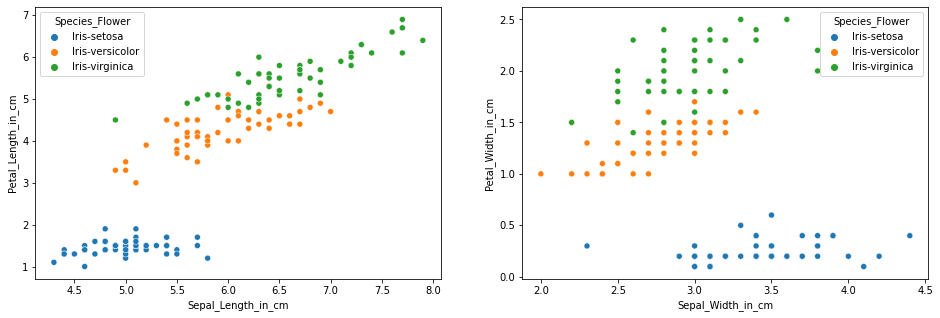

In [16]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='Sepal_Length_in_cm',y='Petal_Length_in_cm',data=df,hue='Species_Flower',ax=ax1)
sns.scatterplot(x='Sepal_Width_in_cm',y='Petal_Width_in_cm',data=df,hue='Species_Flower',ax=ax2)

<AxesSubplot:ylabel='Petal_Width_in_cm'>

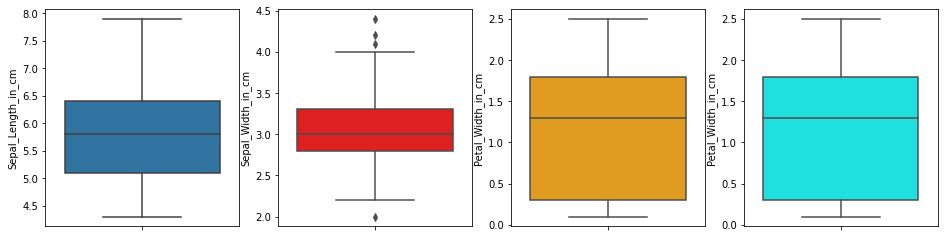

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='Sepal_Length_in_cm')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='Sepal_Width_in_cm',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='Petal_Width_in_cm',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='Petal_Width_in_cm',color='cyan')

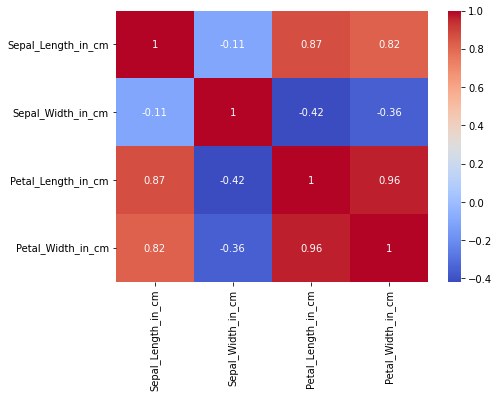

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

# Building Model,Training and Testing

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['Species_Flower'] = le.fit_transform = (df['Species_Flower'])
df.head(10)

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species_Flower'])
Y = df['Species_Flower']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

# Logistic Regression

In [22]:
# Initialize a Logistic Regression
lg= LogisticRegression(max_iter=1000)

In [23]:
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Predict on the test set and calculate accuracy
y_pred=lg.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [25]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,x_test,y_test)

Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%


c:\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


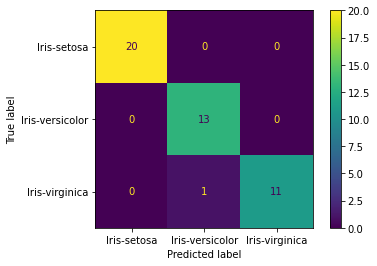

In [26]:
print('Logistic Regression')
report(lg)
print(f'Accuracy: {round(score*100,2)}%')

# Decision Tree Classifier

In [28]:
DTC = DecisionTreeClassifier()

In [30]:
DTC=DTC.fit(x_train,y_train)

In [32]:
y_pred=DTC.predict(x_test)
score=accuracy_score(y_test,y_pred)

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%


c:\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


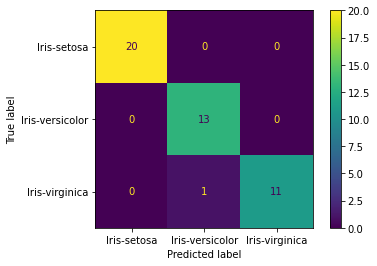

In [33]:
print('Decision Tree Classifier')
report(DTC)
print(f'Accuracy: {round(score*100,2)}%')

# Decision Tree

In [35]:
x_train.size

420

In [36]:
y_train.size

105

In [38]:
from sklearn import tree
D_tree = tree.DecisionTreeClassifier()
D_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
pred_tree=D_tree.predict(x_test)
accuracy=accuracy_score(y_test,pred_tree)*100

In [42]:
accuracy

97.77777777777777

# Graphs

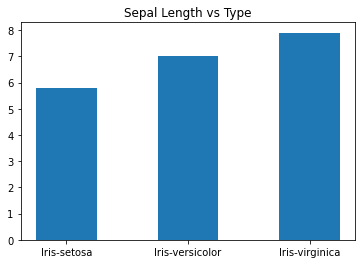

In [45]:
plt.bar(df['Species_Flower'],df['Sepal_Length_in_cm'], width = 0.5) 
plt.title("Sepal Length vs Type")
plt.show()

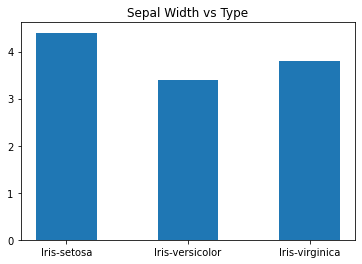

In [47]:
plt.bar(df['Species_Flower'],df['Sepal_Width_in_cm'], width = 0.5) 
plt.title("Sepal Width vs Type")
plt.show()

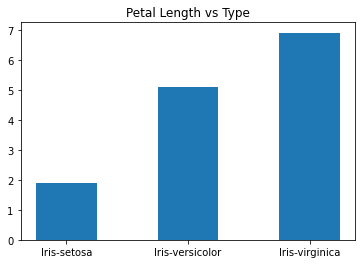

In [48]:
plt.bar(df['Species_Flower'],df['Petal_Length_in_cm'], width = 0.5) 
plt.title("Petal Length vs Type")
plt.show()

# KNN

In [49]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit(x_train)
x_train_std = standard_scaler.transform(x_train)
x_test_std = standard_scaler.transform(x_test)

In [50]:
x_train_std

array([[ 1.08438656, -0.55742433,  0.50838092,  0.17868833],
       [ 1.20855296,  0.15346095,  0.56723428,  0.31366873],
       [ 0.46355456, -1.26830962,  0.56723428,  0.31366873],
       [ 0.46355456, -0.7943861 ,  0.56723428,  0.71860992],
       [-0.52977664, -1.03134786,  0.27296748, -0.09127246],
       [-1.27477504, -0.08350081, -1.49263328, -1.44107642],
       [-1.89560703, -0.08350081, -1.55148664, -1.44107642],
       [ 2.07771775, -0.08350081,  1.56774137,  1.12355111],
       [ 0.58772096, -0.32046257,  0.21411412,  0.04370794],
       [ 0.21522176, -1.03134786,  0.97920779,  0.17868833],
       [-1.02644224,  1.81219328, -1.37492656, -1.44107642],
       [-1.02644224,  0.86434624, -1.43377992, -1.44107642],
       [ 0.21522176, -0.55742433,  0.03755405,  0.04370794],
       [ 1.58105215,  0.39042271,  1.21462122,  0.71860992],
       [-1.27477504,  0.15346095, -1.43377992, -1.57605682],
       [ 1.33271936,  0.39042271,  0.44952756,  0.17868833],
       [ 0.46355456, -0.

In [54]:
y_train

76     Iris-versicolor
52     Iris-versicolor
72     Iris-versicolor
123     Iris-virginica
90     Iris-versicolor
            ...       
62     Iris-versicolor
5          Iris-setosa
128     Iris-virginica
79     Iris-versicolor
97     Iris-versicolor
Name: Species_Flower, Length: 105, dtype: object

In [51]:
KNN=KNeighborsClassifier(n_neighbors=6)

In [52]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

KNN
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%


c:\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


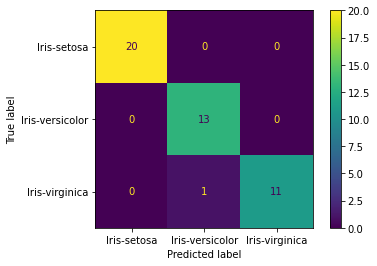

In [53]:
print('KNN')
report(KNN)
print(f'Accuracy: {round(score*100,2)}%')